In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('weather_report.csv')

In [35]:
t=pd.DataFrame(df['PM2.5'],index=df.index,columns=['PM2.5'])
def f(x):return float(x) if x!='None' else 0
t['PM2.5'].apply(f)
t['PM2.5'].replace('None',0,inplace=True)
t['PM2.5']=t['PM2.5'].astype(float)

In [36]:
t['PM2.5'].dtype

dtype('float64')

In [28]:
pd.to_numeric(t['PM2.5'])

0       99.25
1       55.64
2       71.49
3       75.06
4       73.29
        ...  
1737    16.01
1738    12.82
1739    14.93
1740    17.53
1741    16.87
Name: PM2.5, Length: 1742, dtype: float64

<AxesSubplot:>

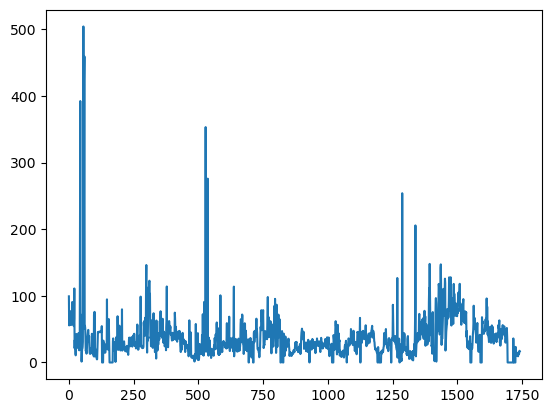

In [37]:
t['PM2.5'].plot()

In [3]:
def df_to_x_y(df,window_size=5):
    df_as_np=df.to_numpy()
    x,y=[],[]
    for i in range(len(df_as_np)-window_size):
        row=[[a] for a in df_as_np[i:i+5]]
        x.append(row)
        label=df_as_np[i+5]
        y.append(label)
    return np.array(x),np.array(y)

In [4]:
x=pd.DataFrame(df['PM2.5'],index=df.index,columns=['PM2.5'])

In [5]:
def f(x):return None if x=='None' else float(x)
x['PM2.5']=x['PM2.5'].apply(f)

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1650 non-null   float64
dtypes: float64(1)
memory usage: 13.7 KB


In [7]:
x_nn=x[x['PM2.5'].notnull()]

In [8]:
x_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 1741
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1650 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [9]:
X,y=df_to_x_y(x_nn['PM2.5'],5)

In [10]:
X,y

(array([[[99.25],
         [55.64],
         [71.49],
         [75.06],
         [73.29]],
 
        [[55.64],
         [71.49],
         [75.06],
         [73.29],
         [67.1 ]],
 
        [[71.49],
         [75.06],
         [73.29],
         [67.1 ],
         [56.17]],
 
        ...,
 
        [[ 9.25],
         [10.49],
         [14.35],
         [16.01],
         [12.82]],
 
        [[10.49],
         [14.35],
         [16.01],
         [12.82],
         [14.93]],
 
        [[14.35],
         [16.01],
         [12.82],
         [14.93],
         [17.53]]]),
 array([67.1 , 56.17, 66.49, ..., 14.93, 17.53, 16.87]))

In [11]:
y.shape,X.shape

((1645,), (1645, 5, 1))

In [46]:
x_train,y_train=X[:900],y[:900]
x_val,y_val=X[900:1000],y[900:1000]
x_test,y_test=X[1000:],y[1000:]
x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape

((900, 5, 1), (900,), (100, 5, 1), (100,), (645, 5, 1), (645,))

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [48]:
model=Sequential()

In [49]:
model.add(InputLayer((5,1)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(8,'relu'))
model.add(Dense(1,'linear'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 128)              33792     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 8)                 1032      
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 34,833
Trainable params: 34,833
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])

In [51]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Epoch 1/10
29/29 [==============================] - 2s 16ms/step - loss: 2714.8311 - root_mean_squared_error: 52.1040 - val_loss: 820.4866 - val_root_mean_squared_error: 28.6441
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 2681.6682 - root_mean_squared_error: 51.7848 - val_loss: 795.8895 - val_root_mean_squared_error: 28.2115
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 2646.2283 - root_mean_squared_error: 51.4415 - val_loss: 769.9600 - val_root_mean_squared_error: 27.7482
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 2615.3608 - root_mean_squared_error: 51.1406 - val_loss: 746.9728 - val_root_mean_squared_error: 27.3308
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 2588.9216 - root_mean_squared_error: 50.8814 - val_loss: 724.0778 - val_root_mean_squared_error: 26.9087
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 2559.4978 - root_mean_squared_error: 50.59

In [52]:
y_pred=model.predict(x_train).flatten()
df1=pd.DataFrame(data={'Prediction':y_pred,'Actual':y_train})
df1

29/29 [==============================] - 0s 811us/step


,Prediction,Actual
0,4.110239,67.10
1,4.313136,56.17
2,4.243840,66.49
3,4.266791,77.11
4,4.272611,66.07
...,...,...
895,6.190777,20.78
896,6.377382,23.64
897,6.386760,26.23
898,6.294600,31.96
